# 📊 Marketing Funnel & Conversion Performance Analysis  
### Shopping Mall Paid Search Campaign Dataset  

This analysis evaluates marketing funnel performance using the Shopping Mall Paid Search dataset.  
The objective is to identify conversion drop-offs, measure campaign performance, and provide actionable recommendations to improve ROI.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("fs.csv")
print(df.head())


                                   Ad Group Month  Impressions  Clicks   CTR  \
0    Shop - 1:1 - Desk - [shop coupon code]  July        16038    6504  0.41   
1         Shop - 1:1 - Desk - [shop coupon]  July        36462   14367  0.39   
2  Shop - 1:1 - Desk - [shop discount code]  July         3635    1458  0.40   
3     Shop - 1:1 - Desk - [shop promo code]  July        26185   10418  0.40   
4          Shop - 1:1 - Desk - [shop promo]  July          808     282  0.35   

   Conversions  Conv Rate   Cost   CPC  Revenue  Sale Amount      P&L  
0         1166       0.10   6669  1.03     6402    136770.05 -267.086  
1         2188       0.09  13746  0.96    13262    283215.21 -483.951  
2          248       0.09   1606  1.10     1723     39165.46  117.136  
3         2294       0.12  13278  1.27    13042    284823.48 -235.921  
4           61       0.15    391  1.39      337      7717.77  -53.604  


In [2]:

df = df.drop_duplicates()


In [3]:
df = df.fillna(0)


In [4]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ad Group     190 non-null    object 
 1   Month        190 non-null    object 
 2   Impressions  190 non-null    int64  
 3   Clicks       190 non-null    int64  
 4   CTR          190 non-null    float64
 5   Conversions  190 non-null    int64  
 6   Conv Rate    190 non-null    float64
 7   Cost         190 non-null    int64  
 8   CPC          190 non-null    float64
 9   Revenue      190 non-null    int64  
 10  Sale Amount  190 non-null    float64
 11  P&L          190 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 17.9+ KB
None


In [6]:

df['CTR (%)'] = (df['Clicks'] / df['Impressions']) * 10
df['Conversion Rate (%)'] = (df['Conversions'] / df['Clicks']) * 100
df['Cost Per Customer'] = df['Cost'] / df['Conversions']
df['ROI (%)'] = ((df['Revenue'] - df['Cost']) / df['Cost']) * 100

print(df.head())


                                   Ad Group Month  Impressions  Clicks   CTR  \
0    Shop - 1:1 - Desk - [shop coupon code]  July        16038    6504  0.41   
1         Shop - 1:1 - Desk - [shop coupon]  July        36462   14367  0.39   
2  Shop - 1:1 - Desk - [shop discount code]  July         3635    1458  0.40   
3     Shop - 1:1 - Desk - [shop promo code]  July        26185   10418  0.40   
4          Shop - 1:1 - Desk - [shop promo]  July          808     282  0.35   

   Conversions  Conv Rate   Cost   CPC  Revenue  Sale Amount      P&L  \
0         1166       0.10   6669  1.03     6402    136770.05 -267.086   
1         2188       0.09  13746  0.96    13262    283215.21 -483.951   
2          248       0.09   1606  1.10     1723     39165.46  117.136   
3         2294       0.12  13278  1.27    13042    284823.48 -235.921   
4           61       0.15    391  1.39      337      7717.77  -53.604   

    CTR (%)  Conversion Rate (%)  Cost Per Customer    ROI (%)  
0  4.055368    

In [7]:
total_impressions = df['Impressions'].sum()
total_clicks = df['Clicks'].sum()
total_conversions = df['Conversions'].sum()

print("TOTAL IMPRESSIONS:", total_impressions)
print("TOTAL CLICKS:", total_clicks)
print("TOTAL CONVERSIONS:", total_conversions)

print("Overall CTR:", (total_clicks/total_impressions)*100)
print("Overall Conversion Rate:", (total_conversions/total_clicks)*100)


TOTAL IMPRESSIONS: 2674699
TOTAL CLICKS: 924503
TOTAL CONVERSIONS: 95996
Overall CTR: 34.56474915495164
Overall Conversion Rate: 10.383524985857266


In [9]:
print(df.columns)


Index(['Ad Group', 'Month', 'Impressions', 'Clicks', 'CTR', 'Conversions',
       'Conv Rate', 'Cost', 'CPC', 'Revenue', 'Sale Amount', 'P&L', 'CTR (%)',
       'Conversion Rate (%)', 'Cost Per Customer', 'ROI (%)'],
      dtype='object')


In [10]:
adgroup_summary = df.groupby('Ad Group').agg({
    'Impressions':'sum',
    'Clicks':'sum',
    'Conversions':'sum',
    'Cost':'sum',
    'Revenue':'sum'
}).reset_index()

adgroup_summary['Conversion Rate (%)'] = (adgroup_summary['Conversions'] / adgroup_summary['Clicks']) * 100
adgroup_summary['Cost Per Customer'] = adgroup_summary['Cost'] / adgroup_summary['Conversions']
adgroup_summary['ROI (%)'] = ((adgroup_summary['Revenue'] - adgroup_summary['Cost']) / adgroup_summary['Cost']) * 100

print(adgroup_summary)


                                           Ad Group  Impressions  Clicks  \
0            Shop - 1:1 - Desk - [shop coupon code]        87936   33805   
1                 Shop - 1:1 - Desk - [shop coupon]       183886   66619   
2          Shop - 1:1 - Desk - [shop discount code]        18326    7015   
3             Shop - 1:1 - Desk - [shop promo code]       142526   54312   
4                  Shop - 1:1 - Desk - [shop promo]         5572    1710   
5             Shop - 1:1 - Mob - [shop coupon code]       234766  102347   
6                  Shop - 1:1 - Mob - [shop coupon]       719140  267398   
7           Shop - 1:1 - Mob - [shop discount code]        47029   19497   
8              Shop - 1:1 - Mob - [shop promo code]       304202  132203   
9                   Shop - 1:1 - Mob - [shop promo]        12153    4268   
10  Shop - Exact - Desk - Black Friday/Cyber Monday          257      24   
11                 Shop - Exact - Desk - Competitor         3969     905   
12          

## 🏷 Ad Group Performance Analysis

To identify top and underperforming segments, we analyze:

- Total Conversions by Ad Group
- Cost Per Customer
- ROI (%)

This helps determine where budget allocation should be increased or optimized.


In [11]:
best_adgroup = adgroup_summary.loc[adgroup_summary['Conversions'].idxmax()]
worst_adgroup = adgroup_summary.loc[adgroup_summary['Conversions'].idxmin()]

print("Best Performing Ad Group:")
print(best_adgroup)

print("\nWorst Performing Ad Group:")
print(worst_adgroup)


Best Performing Ad Group:
Ad Group               Shop - 1:1 - Mob - [shop promo code]
Impressions                                          304202
Clicks                                               132203
Conversions                                           16174
Cost                                                  93570
Revenue                                               88171
Conversion Rate (%)                               12.234216
Cost Per Customer                                  5.785211
ROI (%)                                           -5.770012
Name: 8, dtype: object

Worst Performing Ad Group:
Ad Group               Shop - Phrase - Desk - Competitor
Impressions                                          109
Clicks                                                10
Conversions                                            2
Cost                                                   7
Revenue                                               13
Conversion Rate (%)                      

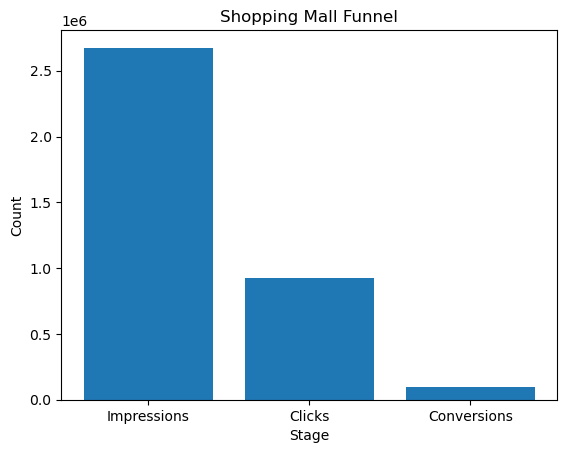

In [12]:
total_impressions = df['Impressions'].sum()
total_clicks = df['Clicks'].sum()
total_conversions = df['Conversions'].sum()

stages = ['Impressions', 'Clicks', 'Conversions']
values = [total_impressions, total_clicks, total_conversions]

import matplotlib.pyplot as plt

plt.figure()
plt.bar(stages, values)
plt.title("Shopping Mall Funnel")
plt.xlabel("Stage")
plt.ylabel("Count")
plt.show()


## 🔍 Marketing Funnel Analysis

The marketing funnel stages analyzed:

1. Impressions – Number of times ads were shown
2. Clicks – Number of users who clicked the ad
3. Conversions – Number of successful purchases

Key Funnel Metrics:

- Click Through Rate (CTR) = Clicks / Impressions
- Conversion Rate = Conversions / Clicks


In [13]:
month_summary = df.groupby('Month').agg({
    'Impressions':'sum',
    'Clicks':'sum',
    'Conversions':'sum',
    'Revenue':'sum',
    'Cost':'sum'
}).reset_index()

month_summary['Conversion Rate (%)'] = (month_summary['Conversions'] / month_summary['Clicks']) * 100

print(month_summary)


       Month  Impressions  Clicks  Conversions  Revenue    Cost  \
0     August       358832  119034        12230    72116   84225   
1       July       516310  191551        17762    98615  120541   
2   November      1163739  380920        43267   252833  280753   
3    October       325423  116711        13312    79303   78256   
4  September       310395  116287         9425    59093   71597   

   Conversion Rate (%)  
0            10.274375  
1             9.272726  
2            11.358553  
3            11.405951  
4             8.104947  


## 💡 Key Insights

- Identify best performing Ad Group
- Identify lowest performing Ad Group
- Highlight cost inefficiencies
- Evaluate ROI distribution

These insights drive actionable business decisions.


## 🚀 Recommendations

Based on the analysis:

- Increase budget allocation to high-ROI Ad Groups
- Optimize low-converting campaigns
- Improve ad creatives to increase CTR
- Refine audience targeting
- Reduce cost per acquisition through bid optimization

Strategic improvements in these areas can significantly enhance conversion performance and profitability.
